In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/framingham.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

In [3]:
data = pd.read_csv('/kaggle/input/heart-disease-prediction/framingham.csv')

In [4]:
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

#### Analysing the data

In [5]:
data.shape

(4238, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [8]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)
print(data.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [10]:
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.250000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean    132.368025    82.912062    25.784185    75.730580    81.856127   
std      22.092444    11.974825     4.065913    11.982952    23.910128   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3656.000000  
mean      0.152352  
std       0.359411  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [11]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Insights
* Our data contains 4238 rows and 16 columns.
* Seems like this data is already preprocessed as there is no categorical columns. Those features have been encoded already.
* Columns having mising values are: 'education'(2.5%), 'cigsPerDay'(0.7%), 'BPMeds'(1.3%), 'totChol'(1.2%) and 'glucose'(9.2%). Except the feature glucose all other missing values are less than 2% of data. We can drop all other missing values.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

### Model training and testing

In [13]:
sca = StandardScaler()
y=data['TenYearCHD']
x=data.drop(['TenYearCHD'],axis=1)

x[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]] = sca.fit_transform(data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [14]:
len(x_train)

2449

In [15]:
len(y_test)

1207

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
print('Coefs = ', lr.coef_)

Coefs =  [[ 0.54212579  0.5336592  -0.04146438 -0.11553593  0.27521485  0.31460333
   0.53230124  0.1988303   0.01444121  0.14680611  0.36239016 -0.07657034
  -0.00423228 -0.09848134  0.16300014]]


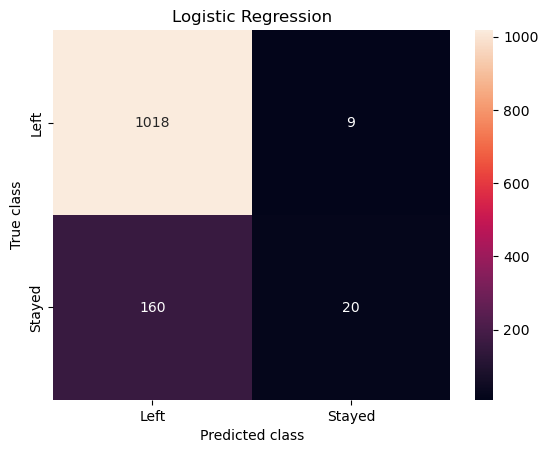

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1027
           1       0.69      0.11      0.19       180

    accuracy                           0.86      1207
   macro avg       0.78      0.55      0.56      1207
weighted avg       0.84      0.86      0.81      1207

Score =  0.859983429991715


In [18]:
y_pred=lr.predict(x_test)
mtx=confusion_matrix(y_test,y_pred)
sns.heatmap(mtx.astype(int),annot = True, fmt='0.0f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()
print(classification_report(y_test,y_pred))
print('Score = ', lr.score(x_test,y_test))

In [19]:
lr.score(x_test,y_test)

0.859983429991715

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
rf.score(x_test,y_test)

0.8500414250207126

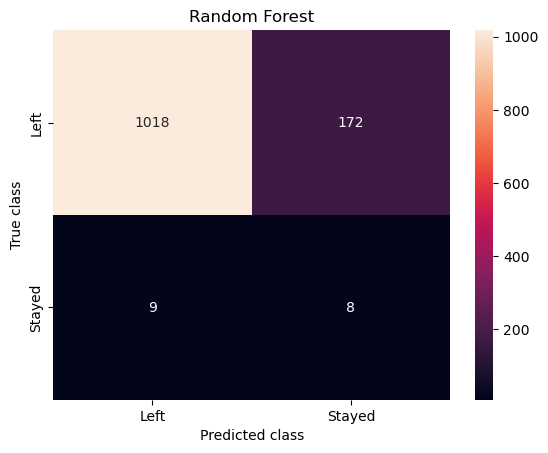

In [22]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.0f',
            xticklabels = ["Left", "Stayed"] ,
            yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

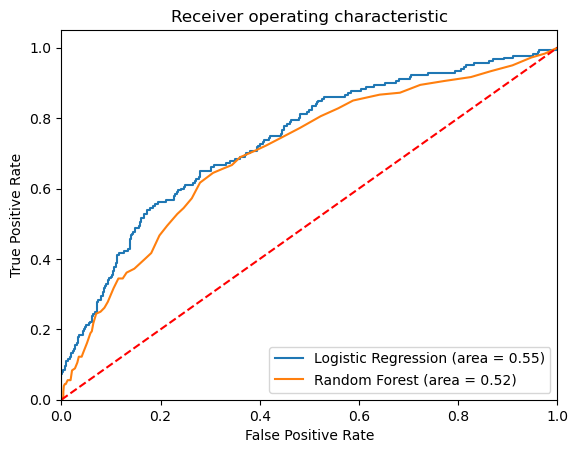

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()